In [71]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn import model_selection
from sklearn.manifold import TSNE, MDS
import matplotlib.pyplot as plt
df = pd.read_csv("wines.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic_Acid       178 non-null    float64
 2   Ash              178 non-null    float64
 3   Ash_Alkalinity   178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Total_Phenols    178 non-null    float64
 6   Flavonoids       178 non-null    float64
 7   Stilbenes        178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color_Intensity  178 non-null    float64
 10  Hue              178 non-null    float64
 11  OD280            178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [72]:
scaled = StandardScaler().fit_transform(df)
scaled = pd.DataFrame(scaled, columns=df.columns)


1

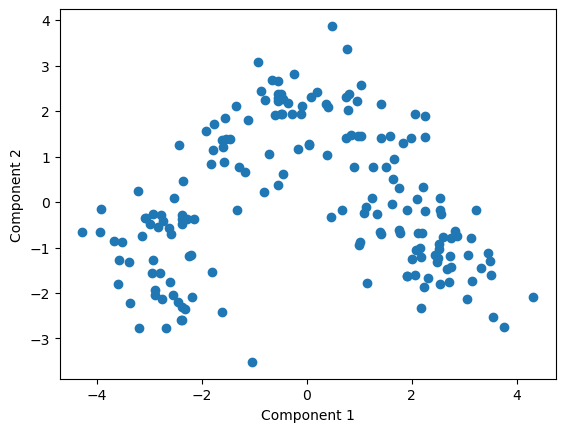

There are 2 Eigenvalues are above 1
There are [4.73243698 2.51108093]
0.5540633835693523 of the variance is explained by these two dimensions


In [73]:
from sklearn.decomposition import PCA
import pandas as pd
from numpy import linalg

cov = np.cov(scaled.T)
eigValue, eigVector = linalg.eig(cov)


pca = PCA(n_components=2)

df_2d = pca.fit_transform(scaled)

pca.fit(scaled)

eigenvalues = pca.explained_variance_

n_eigenvalues = np.sum(eigenvalues > 1)
explain = sum(eigenvalues)/sum(eigValue)
plt.scatter(df_2d[:, 0], df_2d[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()
print('There are', n_eigenvalues,'Eigenvalues are above 1')
print('There are',eigenvalues)
print(explain,'of the variance is explained by these two dimensions')


## Q4 Do a PCA on the data. How many Eigenvalues are above 1? Plotting the 2D solution (projecting the data on the first 2 principal components), how much of the variance is explained by these two dimensions, and how would you interpret them?

I performed PCA on my data to reduce the number of dimensions to 2 and calculated the values of eigenvalues. The explained_variance_ attribute was used to obtain the eigenvalues of the principal components

Since the dataset has a dimensions of 13. By reducing the dimensionality of the data in this way can lead to benefits such as improved model accuracy, faster training and inference times, and easier visualization and interpretation of the data

From the output, there are 2 Eigenvalues are above 1. There are 4.73243698 2.51108093. 0.5540633835693523 of the variance is explained by these two dimensions

It means that the first two principal components together capture more variance than any single original variable in the dataset. The two principal components can explain 55% of the variability in the original data.


2


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized = scaler.fit_transform(df)
scaled = pd.DataFrame(normalized, columns=df.columns)

KL Divergences: [0.6158343553543091, 0.5615267753601074, 0.4922311305999756, 0.42646634578704834, 0.3933400511741638, 0.3398563861846924, 0.319203644990921, 0.2818721830844879, 0.2490079700946808, 0.2358502447605133, 0.19997403025627136, 0.18425343930721283, 0.1699635088443756, 0.15329663455486298, 0.13733844459056854, 0.11987566947937012, 0.11065316945314407, 0.10107956826686859, 0.08665291219949722, 0.08222456276416779, 0.07126583904027939, 0.06398630142211914, 0.059279654175043106, 0.050605978816747665, 0.04434414207935333, 0.039858654141426086, 0.03436978906393051, 0.030296199023723602, 0.02567165344953537, 0.0216977559030056]


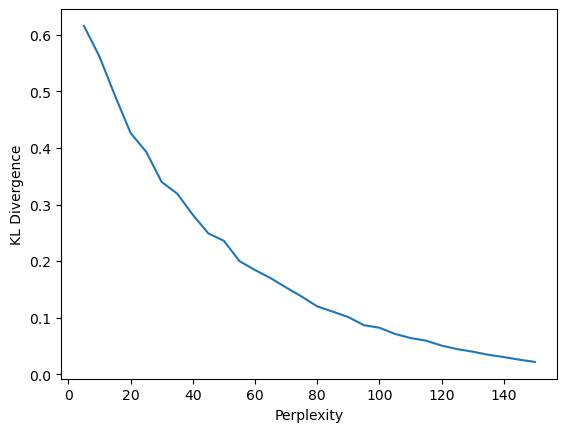

0.42594900727272034


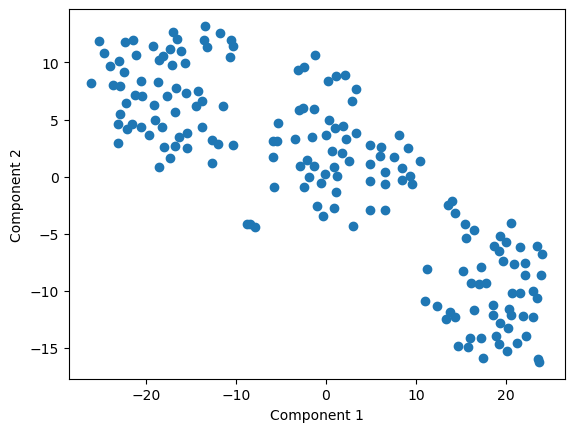

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


perplexities = range(5, 151, 5)
kl_divergences = []

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    embedded = tsne.fit_transform(scaled)
    kl_divergences.append(tsne.kl_divergence_)

print('KL Divergences:', kl_divergences)
plt.plot(perplexities, kl_divergences)
plt.xlabel('Perplexity')
plt.ylabel('KL Divergence')
plt.show()


tsne = TSNE(n_components=2, perplexity=20)
embedded = tsne.fit_transform(scaled)
print(tsne.kl_divergence_)
plt.scatter(embedded[:, 0], embedded[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


## 2 Use t-SNE on the data. How does KL-divergence depend on Perplexity (vary Perplexity from 5 to 150)? Make sure to plot this relationship. Also, show a plot of the 2D component with a Perplexity of 20.

I used t-SNE to reduce the dimensions of my data to 2. Next, I created a loop to iterate over different perplexity values, where for each perplexity, I created a t-SNE object with 2 components and the current perplexity value. The fit_transform method was used to transform the data to 2D space, and the KL divergence was computed for each perplexity value.

t-SNE can be used for reducing high-dimensional data to a lower-dimensional space, while preserving the local structure of the data. It is useful for visualizing complex data structures and identifying patterns that may be difficult to discern in high-dimensional space. 

From the output, we can conclude that the KL divergence is decreasing as the perplexity increases, and it is 0.42 when perplexity = 20

When the KL divergence decreases as the perplexity increases, it indicates that the t-SNE algorithm is getting better at maintaining the relative distances between pairs of data points in the high-dimensional space as it projects them into a lower-dimensional space. In other words, the algorithm is more successful in accurately representing the original data structure in the reduced dimensionality space.

3

/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Stress: 778.786336409476


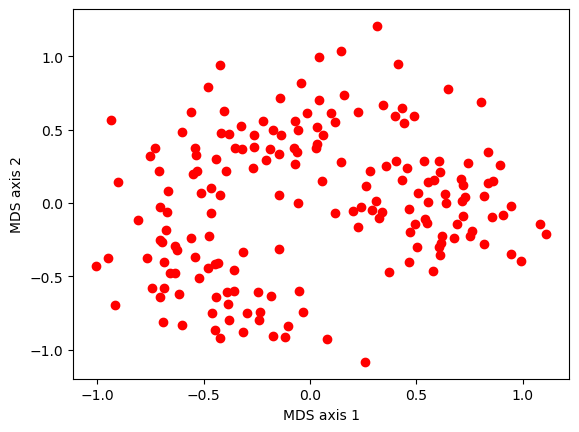

In [21]:
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances


mds = MDS(n_components=2, n_init=100, max_iter=10000)

mds_solution = mds.fit_transform(scaled)

plt.show()

print('Stress:', mds.stress_)

plt.scatter(mds_solution[:, 0], mds_solution[:, 1],c='r')
plt.xlabel('MDS axis 1')
plt.ylabel('MDS axis 2')
plt.show()


## 3 Use MDS on the data. Try a 2-dimensional embedding. What is the resulting stress of this embedding? Also, plot this solution and comment on how it compares to t-SNE. 

I performed MDS to visualize the high-dimensional data in a 2D space. I calcualted the stress and plotted the graph

MDS is a dimensionality reduction technique that can be used to preserve the pairwise distances between data points in the lower-dimensional space.

From the output, we can tell MDS preserves the pairwise distances between the data points as much as possible in the lower-dimensional space and the stress is 778

MDS is also more interpretable because it produces a linear transformation of the data that can be easily related to the original variables. In addition, MDS can be more computationally efficient and scalable to larger datasets than t-SNE.

4


/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

Optimal number of clusters: 3


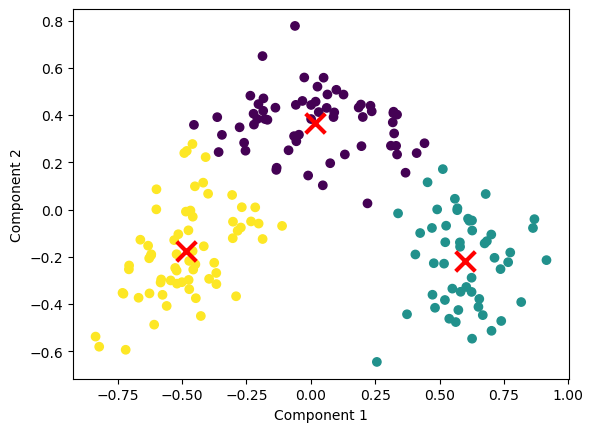

Total sum of distances to cluster centers: 10.771762804100039


In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
pca = PCA(n_components=2)
df_2d = pca.fit_transform(scaled)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_2d)
    score = silhouette_score(df_2d, labels)
    scores.append(score)

best_k = np.argmax(scores) + 2
print('Optimal number of clusters:', best_k)

kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(df_2d)
centers = kmeans.cluster_centers_

plt.scatter(df_2d[:, 0], df_2d[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

total_distance = kmeans.inertia_
print('Total sum of distances to cluster centers:', total_distance)


/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress th

Optimal number of clusters: 3


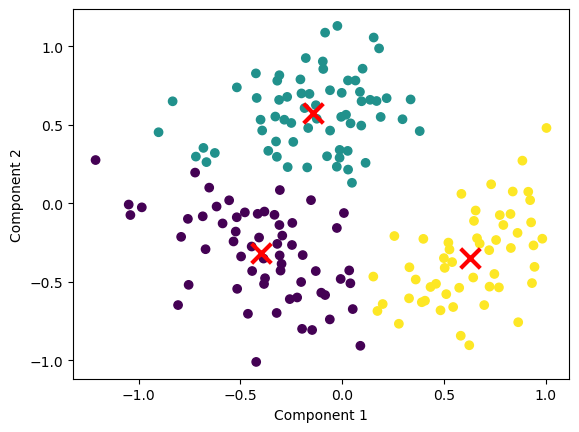

Total sum of distances to cluster centers: 25.294265589457627


In [24]:
mds = MDS(n_components=2, n_init=100, max_iter=10000)

df_2d = mds.fit_transform(scaled)
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_2d)
    score = silhouette_score(df_2d, labels)
    scores.append(score)

best_k = np.argmax(scores) + 2
print('Optimal number of clusters:', best_k)

kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(df_2d)
centers = kmeans.cluster_centers_

plt.scatter(df_2d[:, 0], df_2d[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

total_distance = kmeans.inertia_
print('Total sum of distances to cluster centers:', total_distance)

In [ ]:
mds = MDS(n_components=2, n_init=100, max_iter=10000)

df_2d = mds.fit_transform(scaled)
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_2d)
    score = silhouette_score(df_2d, labels)
    scores.append(score)

best_k = np.argmax(scores) + 2
print('Optimal number of clusters:', best_k)

kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(df_2d)
centers = kmeans.cluster_centers_

plt.scatter(df_2d[:, 0], df_2d[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

total_distance = kmeans.inertia_
print('Total sum of distances to cluster centers:', total_distance)

/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

Optimal number of clusters: 3


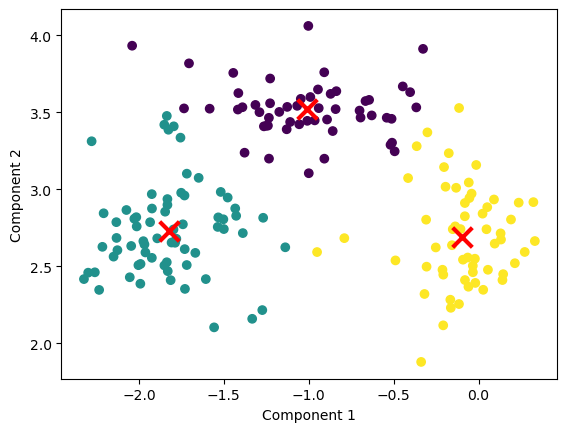

Total sum of distances to cluster centers: 28.630590438842773


In [25]:
tsne = TSNE(n_components=2, perplexity=perplexity)
df_2d = tsne.fit_transform(scaled)
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_2d)
    score = silhouette_score(df_2d, labels)
    scores.append(score)

best_k = np.argmax(scores) + 2
print('Optimal number of clusters:', best_k)

kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(df_2d)
centers = kmeans.cluster_centers_

plt.scatter(df_2d[:, 0], df_2d[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

total_distance = kmeans.inertia_
print('Total sum of distances to cluster centers:', total_distance)

## 4 Building on one of the dimensionality reduction methods above that yielded a 2D solution (1-3, your choice), use the Silhouette method to determine the optimal number of clusters and then use kMeans with that number (k) to produce a plot that represents each wine as a dot in a 2D space in the color of its cluster. What is the total sum of the distance of all points to their respective clusters centers, of this solution?

I did all three dimensionality reduction methods and Silhouette method was used to find the optimal number of clusters. A for loop was used to find the optimal number of clusters. The sum of total distances was calculated.

The silhouette method can be used to evaluate the quality of the resulting low-dimensional representation of the data. After performing the dimensionality reduction, the data points are typically clustered based on their new coordinates in the low-dimensional space. The silhouette score can then be calculated for each data point based on its cluster assignment and the distances to the other clusters.

The results from all three dimensionality reduction methods are 3 is the optimal number of clusters. 


From the results, I believe they are 3 different kinds of wines

5

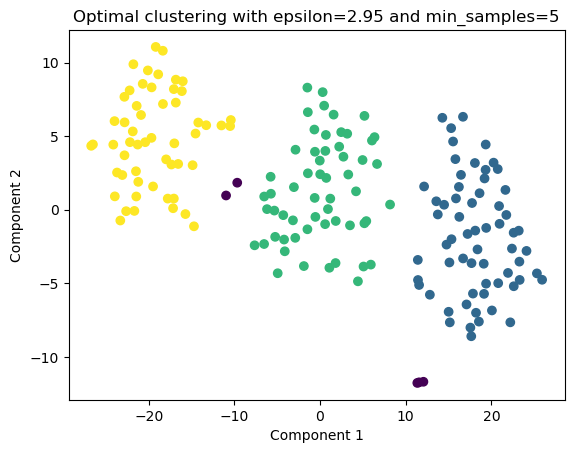

In [81]:
from sklearn.cluster import DBSCAN
import numpy as np

from sklearn.metrics import silhouette_score
best_score = -1
for epsilon in np.arange(0.05, 5, 0.05):
    for min_samples in range(2, 20):
        tsne = TSNE(n_components=2, perplexity=20)
        df_2d = tsne.fit_transform(scaled)
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
        labels = dbscan.fit_predict(df_2d)

        # Calculate silhouette score if there are at least 2 unique labels
        if len(np.unique(labels)) > 1:
            score = silhouette_score(df_2d, labels)

            # Update best score and parameters if current score is better
            if score > best_score:
                best_score = score
                best_labels = labels
                best_epsilon = epsilon
                best_min_samples = min_samples

if best_score != -1:
    plt.scatter(df_2d[:, 0], df_2d[:, 1], c=best_labels, cmap='viridis')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(f'Optimal clustering with epsilon={best_epsilon:.2f} and min_samples={best_min_samples}')
    plt.show()
else:
    print("No suitable clustering found.")



/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version

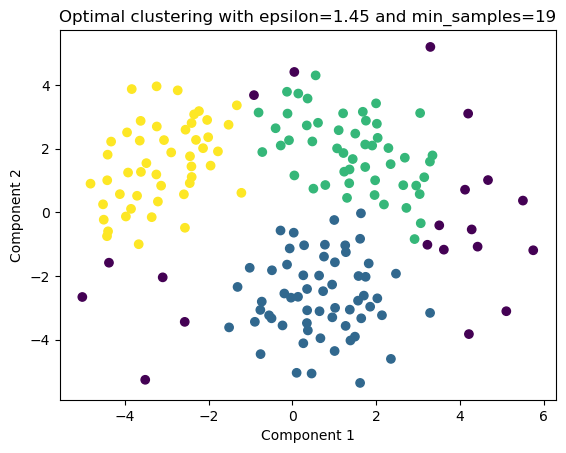

In [79]:

from sklearn.metrics import silhouette_score

best_score = -1

for epsilon in np.arange(0.05, 5, 0.05):
    for min_samples in range(2, 20):
        mds = MDS(n_components=2, n_init=100, max_iter=10000)

        df_2d = mds.fit_transform(scaled)
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
        labels = dbscan.fit_predict(df_2d)

        # Calculate silhouette score if there are at least 2 unique labels
        if len(np.unique(labels)) > 1:
            score = silhouette_score(df_2d, labels)

            # Update best score and parameters if current score is better
            if score > best_score:
                best_score = score
                best_labels = labels
                best_epsilon = epsilon
                best_min_samples = min_samples

if best_score != -1:
    plt.scatter(df_2d[:, 0], df_2d[:, 1], c=best_labels, cmap='viridis')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(f'Optimal clustering with epsilon={best_epsilon:.2f} and min_samples={best_min_samples}')
    plt.show()
else:
    print("No suitable clustering found.")


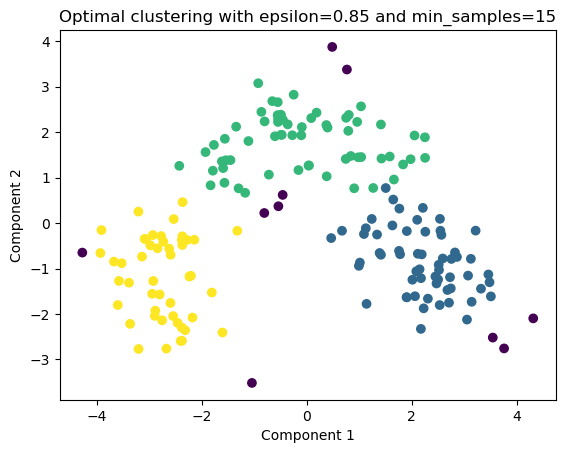

In [80]:
from sklearn.metrics import silhouette_score

best_score = -1

for epsilon in np.arange(0.05, 5, 0.05):
    for min_samples in range(2, 20):
        # Fit DBSCAN model
        pca = PCA(n_components=2)
        df_2d = pca.fit_transform(scaled)
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
        labels = dbscan.fit_predict(df_2d)

        # Calculate silhouette score if there are at least 2 unique labels
        if len(np.unique(labels)) > 1:
            score = silhouette_score(df_2d, labels)

            # Update best score and parameters if current score is better
            if score > best_score:
                best_score = score
                best_labels = labels
                best_epsilon = epsilon
                best_min_samples = min_samples
if best_score != -1:
    plt.scatter(df_2d[:, 0], df_2d[:, 1], c=best_labels, cmap='viridis')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(f'Optimal clustering with epsilon={best_epsilon:.2f} and min_samples={best_min_samples}')
    plt.show()
else:
    print("No suitable clustering found.")


## 5 Building on one of the dimensionality reduction methods above that yielded a 2D solution (1-3, your choice), use dBScan to produce a plot that represents each wine as a dot in a 2D space in the color of its cluster. Make sure to suitably pick the radius of the perimeter (“epsilon”) and the minimal number of points within the perimeter to form a cluster (“minPoints”) and comment on your choice of these two hyperparameters.

I performed all three methods and used the silhouette method to find the best parameters for clustering the data using DBSCAN algorithm. The code looped through different values of epsilon and min_samples and fits a DBSCAN model with the method reduced 2D data. The silhouette score is calculated for each parameter combination, and the best_score and best_parameters are updated if a better score is obtained. Finally, the best_labels are plotted

The silhouette method evaluates the quality of a low-dimensional representation of data after clustering. It calculates a score for each data point based on its cluster assignment and distance to other clusters.

For PCA, the optimal epsilon is 0.85 and min_samples is 15. For MDS, the optimal epsilon is 1.45 and min_samples is 19. For TSNE, the optimal epsilon is 2.95 and min_samples is 9. 

Epsilon determines the radius of the neighborhood around a data point. PCA has the smallest and TSNE has the largest. Min_sample specifies the minimum number of data points required to form a dense region.

## Extra 1 Given your answers to all of these questions taken together, how many different kinds of wine do you think there are and how do they differ?

From the result of question 4, I believe there are 3 kinds of wines. Because all three methods give the same optimal clusters(3).

Dimension reduction methods like t-SNE preserve the local structure of the data, so points that are close together in the original high-dimensional space are also close together in the lower-dimensional space. This means that dots that are close together on the plot have similar feature values in the high-dimensional space, and are likely to belong to the same cluster or group.

 They are differ by the distance of each other on the 2d plot

Extra 2

In [84]:
df1 = df[['Alcohol', 'Total_Phenols', 'Hue', 'Proline']]

In [85]:
scaler = MinMaxScaler()
normalized = scaler.fit_transform(df1)
scaled = pd.DataFrame(normalized, columns=df1.columns)

/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

Optimal number of clusters: 3


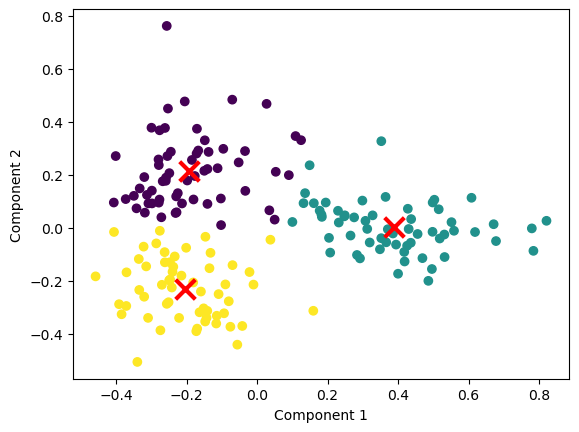

Total sum of distances to cluster centers: 5.939408928510655


In [86]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
pca = PCA(n_components=2)
df_2d = pca.fit_transform(scaled)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_2d)
    score = silhouette_score(df_2d, labels)
    scores.append(score)

best_k = np.argmax(scores) + 2
print('Optimal number of clusters:', best_k)

kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(df_2d)
centers = kmeans.cluster_centers_

plt.scatter(df_2d[:, 0], df_2d[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

total_distance = kmeans.inertia_
print('Total sum of distances to cluster centers:', total_distance)


/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Optimal number of clusters: 3


/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

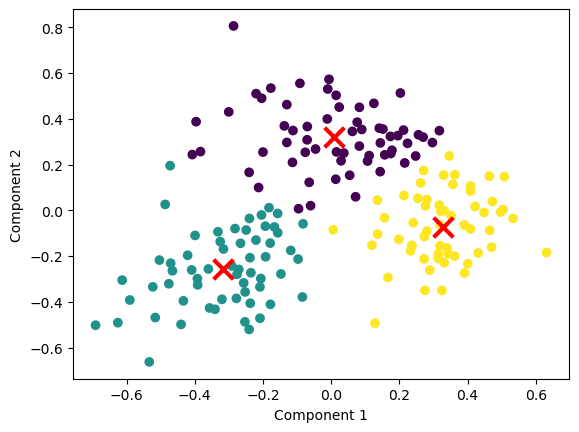

Total sum of distances to cluster centers: 8.127320361845829


In [87]:
mds = MDS(n_components=2, n_init=100, max_iter=10000)

df_2d = mds.fit_transform(scaled)
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_2d)
    score = silhouette_score(df_2d, labels)
    scores.append(score)

best_k = np.argmax(scores) + 2
print('Optimal number of clusters:', best_k)

kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(df_2d)
centers = kmeans.cluster_centers_

plt.scatter(df_2d[:, 0], df_2d[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

total_distance = kmeans.inertia_
print('Total sum of distances to cluster centers:', total_distance)

/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yanggezheng/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

Optimal number of clusters: 3


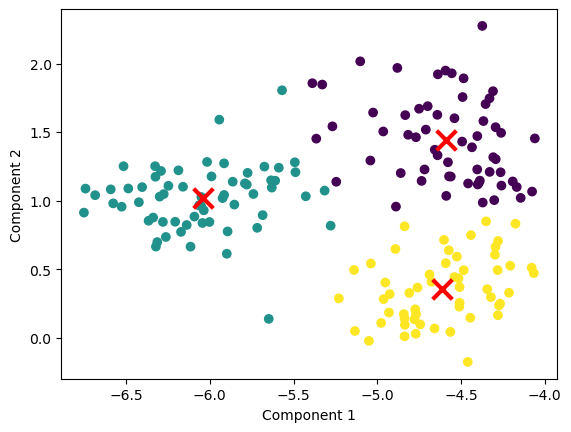

Total sum of distances to cluster centers: 31.41023063659668


In [88]:
tsne = TSNE(n_components=2, perplexity=perplexity)
df_2d = tsne.fit_transform(scaled)
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_2d)
    score = silhouette_score(df_2d, labels)
    scores.append(score)

best_k = np.argmax(scores) + 2
print('Optimal number of clusters:', best_k)

kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(df_2d)
centers = kmeans.cluster_centers_

plt.scatter(df_2d[:, 0], df_2d[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

total_distance = kmeans.inertia_
print('Total sum of distances to cluster centers:', total_distance)

## Extra 2 Is there anything of interest you learned about wines from exploring this dataset withunsupervised machine learning method that is worth noting and not already covered in the questions above?


I have some knowledge about wine, I think some of these 13 attributes are relatively unimportant. So I created a new df only these 4 properties Malic acid concentration, Total phenols, Color intensity and hue, Proline content

I also performed all 3 methods on it. And the result are the same. (3 is the optimal number of clusters)